In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

In [2]:
import seaborn as sns

In [3]:
data_path = r'../data/processed_data_v2.csv'

In [4]:
data = pd.read_csv(data_path)

In [5]:
data.shape

(689, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   review                    689 non-null    object
 1   rating                    689 non-null    int64 
 2   regex_cleaned_review      689 non-null    object
 3   stopwords_cleaned_review  689 non-null    object
 4   brand_cleaned_review      689 non-null    object
 5   stemmed_review            689 non-null    object
dtypes: int64(1), object(5)
memory usage: 32.4+ KB


In [5]:
pd.set_option('display.max_colwidth', None)

In [8]:
data.sample(n=10, random_state=50)

,review,rating,regex_cleaned_review,stopwords_cleaned_review,brand_cleaned_review,stemmed_review
16,"Kurang suka rasanya. Baunya aneh, terlalu menyengat",1,kurang suka rasanya baunya aneh terlalu menyengat,kurang suka rasanya baunya aneh terlalu menyengat,kurang suka rasanya baunya aneh terlalu menyengat,kurang suka rasa bau aneh terlalu sengat
570,pernah beli karena liat harganya murah. ternyata pas dicoba lumayan juga menyerap minyak di wajah. isinya pun banyak,3,pernah beli karena liat harganya murah ternyata pas dicoba lumayan juga menyerap minyak di wajah isinya pun banyak,pernah beli liat harganya murah ternyata pas dicoba lumayan menyerap minyak wajah isinya banyak,pernah beli liat harganya murah ternyata pas dicoba lumayan menyerap minyak wajah isinya banyak,pernah beli liat harga murah nyata pas coba lumayan serap minyak wajah isi banyak
468,Nyobain yg rasa jasmine.. segerr banget rasanya..rasa teh nya terasa,5,nyobain yg rasa jasmine segerr banget rasanya rasa teh nya terasa,nyobain yg rasa jasmine segerr banget rasanya rasa teh nya terasa,nyobain yg rasa jasmine segerr banget rasanya rasa teh nya terasa,nyobain yg rasa jasmine segerr banget rasa rasa teh nya asa
339,Saya pribadi suka dengan rasa unik telur asin ini. Saya tidak mengerti kenapa banyak yang menyukainya. Mungkin baunya saja yang agak menggelitik di hidung.,5,saya pribadi suka dengan rasa unik telur asin ini saya tidak mengerti kenapa banyak yang menyukainya mungkin baunya saja yang agak menggelitik di hidung,pribadi suka rasa unik telur asin mengerti banyak menyukainya mungkin baunya menggelitik hidung,pribadi suka rasa unik telur asin mengerti banyak menyukainya mungkin baunya menggelitik hidung,pribadi suka rasa unik telur asin erti banyak suka mungkin bau gelitik hidung
104,"Pertama di buka bumbunya bau nyengat. Setelah matang dan saya aduk bumbunya sm mie nya lengket. Rasanya tidak enak, lebih baik indomie goreng yang biasa.",2,pertama di buka bumbunya bau nyengat setelah matang dan saya aduk bumbunya sm mie nya lengket rasanya tidak enak lebih baik indomie goreng yang biasa,pertama buka bumbunya bau nyengat matang aduk bumbunya sm mie nya lengket rasanya enak lebih baik indomie goreng biasa,pertama buka bumbunya bau nyengat matang aduk bumbunya sm nya lengket rasanya enak lebih baik goreng biasa,pertama buka bumbu bau nyengat matang aduk bumbu sm nya lengket rasa enak lebih baik goreng biasa
2,"Waktu pertama melihat produknya, saya cukup excited karena saya suka sekali dengan produk berbau 'salted egg'. Ternyata Indomie varian ini tidak sesuai dengan ekspetasi saya. Perpaduan tekstur mie dan saus salted egg ternyata agak 'menjijikkan'. Sama sekali tidak cocok.",1,waktu pertama melihat produknya saya cukup excited karena saya suka sekali dengan produk berbau salted egg ternyata indomie varian ini tidak sesuai dengan ekspetasi saya perpaduan tekstur mie dan saus salted egg ternyata agak menjijikkan sama sekali tidak cocok,waktu pertama melihat produknya cukup excited suka sekali produk berbau salted egg ternyata indomie varian sesuai ekspetasi perpaduan tekstur mie saus salted egg ternyata menjijikkan sama sekali cocok,waktu pertama melihat produknya cukup excited suka sekali produk berbau ternyata varian sesuai ekspetasi perpaduan tekstur saus ternyata menjijikkan sama sekali cocok,waktu pertama lihat produk cukup excited suka sekali produk bau nyata varian sesuai ekspetasi padu tekstur saus nyata jijik sama sekali cocok
665,"Harganya murah, mudah banget ditemuin dimana-mana, cuma kertasnya terlalu tipis dan kurang menyerap minyak",4,harganya murah mudah banget ditemuin dimana mana cuma kertasnya terlalu tipis dan kurang menyerap minyak,harganya murah mudah banget ditemuin mana cuma kertasnya terlalu tipis kurang menyerap minyak,harganya murah mudah banget ditemuin mana cuma kertasnya terlalu tipis kurang menyerap minyak,harga murah mudah banget ditemuin mana cuma kertas terlalu tipis kurang serap minyak
487,"Aku pernah nyobain ini karena dikasih sa

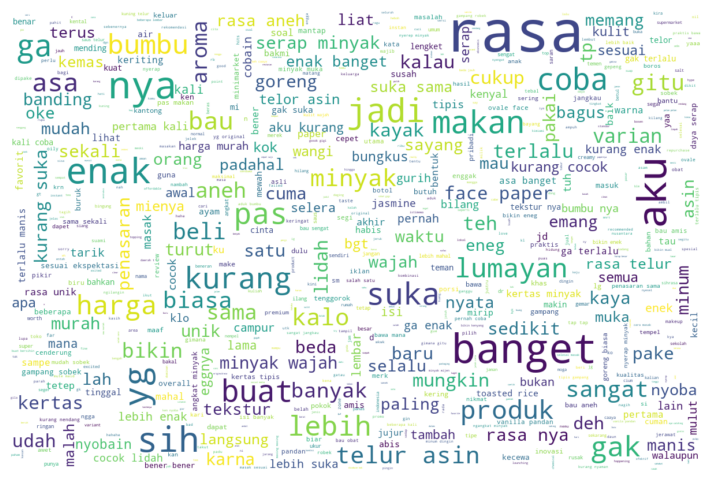

In [9]:
wc = WordCloud(background_color="white", max_words=1000, max_font_size=100, random_state=25,
               width=1200, height=800).generate(''.join(data['stemmed_review']))
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Convert rating (1, 2) to "Negative", (3) to "Neutral" and (4, 5) to "Positive"

In [6]:
data["review_sentiment"] = data.rating.map({
    1 : "Negative",
    2 : "Negative",
    3 : "Neutral",
    4 : "Positive",
    5 : "Positive"
})

In [11]:
data.sample(n=5, random_state=50)

,review,rating,regex_cleaned_review,stopwords_cleaned_review,brand_cleaned_review,stemmed_review,review_sentiment
16,"Kurang suka rasanya. Baunya aneh, terlalu menyengat",1,kurang suka rasanya baunya aneh terlalu menyengat,kurang suka rasanya baunya aneh terlalu menyengat,kurang suka rasanya baunya aneh terlalu menyengat,kurang suka rasa bau aneh terlalu sengat,Negative
570,pernah beli karena liat harganya murah. ternyata pas dicoba lumayan juga menyerap minyak di wajah. isinya pun banyak,3,pernah beli karena liat harganya murah ternyata pas dicoba lumayan juga menyerap minyak di wajah isinya pun banyak,pernah beli liat harganya murah ternyata pas dicoba lumayan menyerap minyak wajah isinya banyak,pernah beli liat harganya murah ternyata pas dicoba lumayan menyerap minyak wajah isinya banyak,pernah beli liat harga murah nyata pas coba lumayan serap minyak wajah isi banyak,Neutral
468,Nyobain yg rasa jasmine.. segerr banget rasanya..rasa teh nya terasa,5,nyobain yg rasa jasmine segerr banget rasanya rasa teh nya terasa,nyobain yg rasa jasmine segerr banget rasanya rasa teh nya terasa,nyobain yg rasa jasmine segerr banget rasanya rasa teh nya terasa,nyobain yg rasa jasmine segerr banget rasa rasa teh nya asa,Positive
339,Saya pribadi suka dengan rasa unik telur asin ini. Saya tidak mengerti kenapa banyak yang menyukainya. Mungkin baunya saja yang agak menggelitik di hidung.,5,saya pribadi suka dengan rasa unik telur asin ini saya tidak mengerti kenapa banyak yang menyukainya mungkin baunya saja yang agak menggelitik di hidung,pribadi suka rasa unik telur asin mengerti banyak menyukainya mungkin baunya menggelitik hidung,pribadi suka rasa unik telur asin mengerti banyak menyukainya mungkin baunya menggelitik hidung,pribadi suka rasa unik telur asin erti banyak suka mungkin bau gelitik hidung,Positive
104,"Pertama di buka bumbunya bau nyengat. Setelah matang dan saya aduk bumbunya sm mie nya lengket. Rasanya tidak enak, lebih baik indomie goreng yang biasa.",2,pertama di buka bumbunya bau nyengat setelah matang dan saya aduk bumbunya sm mie nya lengket rasanya tidak enak lebih baik indomie goreng yang biasa,pertama buka bumbunya bau nyengat matang aduk bumbunya sm mie nya lengket rasanya enak lebih baik indomie goreng biasa,pertama buka bumbunya bau nyengat matang aduk bumbunya sm nya lengket rasanya enak lebih baik goreng biasa,pertama buka bumbu bau nyengat matang aduk bumbu sm nya lengket rasa enak lebih baik goreng biasa,Negative


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_x, test_x, train_y, test_y = train_test_split(
    data.stemmed_review, 
    data.review_sentiment,
    test_size=0.2,
    stratify=data.review_sentiment,
    random_state=50
)

In [9]:
#import TfidfVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
# Create pipeline
random_forest_pipe = Pipeline(steps=[
    ('tf-idf', TfidfVectorizer()),
    ('random forest', RandomForestClassifier(random_state=50)),
])

# Training
random_forest_pipe.fit(train_x, train_y)

# Make prediction
random_forest_prediction = random_forest_pipe.predict(test_x)

print(classification_report(test_y, random_forest_prediction))

              precision    recall  f1-score   support

    Negative       0.83      0.44      0.58        34
     Neutral       0.62      0.64      0.63        56
    Positive       0.61      0.79      0.69        48

    accuracy                           0.64       138
   macro avg       0.69      0.63      0.63       138
weighted avg       0.67      0.64      0.64       138



In [20]:
test_y[:10]

115    Negative
206     Neutral
6      Negative
257     Neutral
195     Neutral
424    Positive
407    Negative
95     Negative
85     Negative
109    Negative
Name: review_sentiment, dtype: object

In [21]:
random_forest_prediction[:10]

array(['Negative', 'Neutral', 'Neutral', 'Negative', 'Neutral',
       'Positive', 'Negative', 'Neutral', 'Neutral', 'Negative'],
      dtype=object)

In [26]:
unique_elements, counts_elements = np.unique(random_forest_prediction, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[['Negative' 'Neutral' 'Positive']
 [18 58 62]]


In [27]:
classes = ['Negative', 'Neutral', 'Positive']

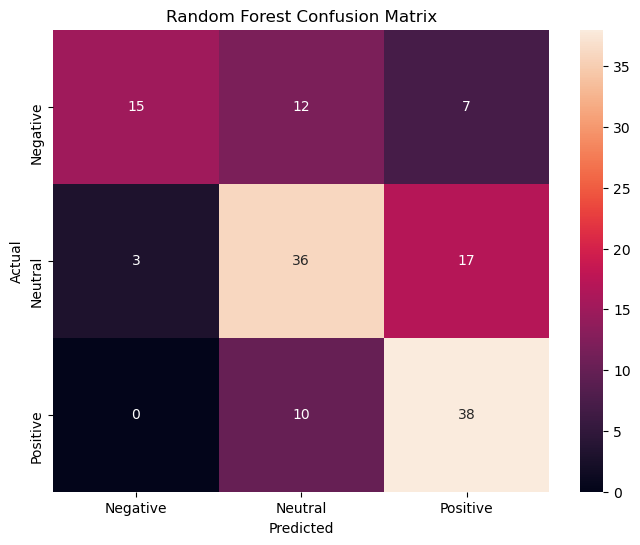

In [28]:
conf_mat = confusion_matrix(test_y, random_forest_prediction)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest Confusion Matrix')
plt.show()

### Clear sign of overlapped review with rating 3, it confused whether it's positive or negative

### Negative review is undersampling, that's why the model suffer a lot from it

In [12]:
from sklearn.metrics import f1_score

In [47]:
n_estimator_list = []
rf_f1_collection = []

# Mencoba model Random Forest dengan berbagai n_estimators
for x in range(100, 2000, 50):
    rf_pipe = Pipeline(
        steps=[
            ('tf-idf', TfidfVectorizer()),
            ('random forest', RandomForestClassifier(random_state=50, n_estimators=x)),
        ])
    rf_pipe.fit(train_x, train_y)
    n_estimator_list.append(x)
    prediction = rf_pipe.predict(test_x)
    rf_f1 = f1_score(test_y, prediction, average='weighted')
    rf_f1_collection.append(rf_f1)

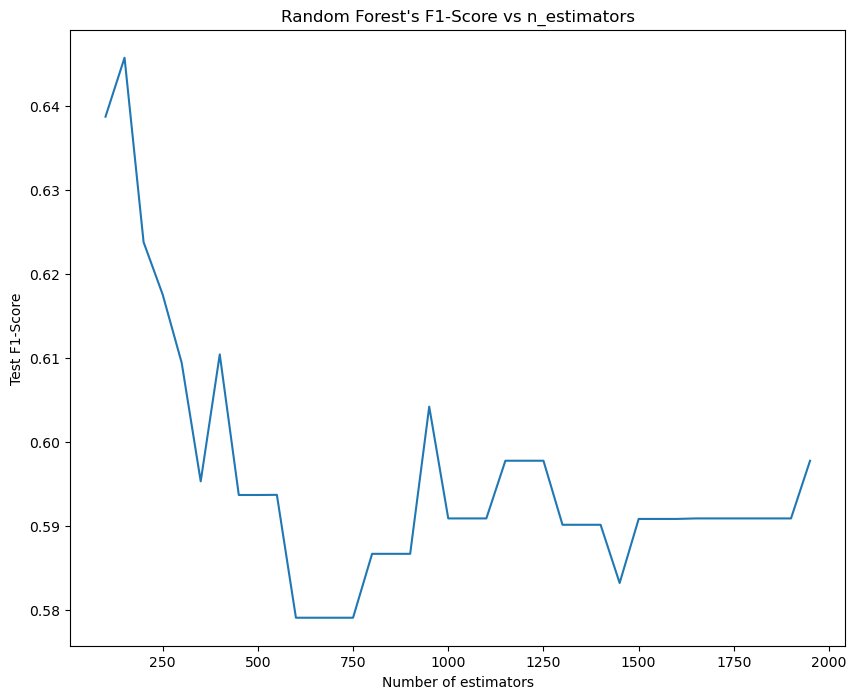

In [48]:
plt.figure(figsize=(10, 8))
sns.lineplot(x=n_estimator_list, y=rf_f1_collection)
plt.title('Random Forest\'s F1-Score vs n_estimators')
plt.xlabel('Number of estimators')
plt.ylabel('Test F1-Score')
# plt.savefig('Random_forest_rmse.png')
plt.show()

In [49]:
# Create pipeline
random_forest_pipe = Pipeline(steps=[
    ('tf-idf', TfidfVectorizer()),
    ('random forest', RandomForestClassifier(random_state=50, n_estimators=150)),
])

# Training
random_forest_pipe.fit(train_x, train_y)

# Make prediction
random_forest_prediction = random_forest_pipe.predict(test_x)

print(classification_report(test_y, random_forest_prediction))

              precision    recall  f1-score   support

    Negative       0.83      0.44      0.58        34
     Neutral       0.62      0.66      0.64        56
    Positive       0.63      0.79      0.70        48

    accuracy                           0.65       138
   macro avg       0.69      0.63      0.64       138
weighted avg       0.68      0.65      0.65       138



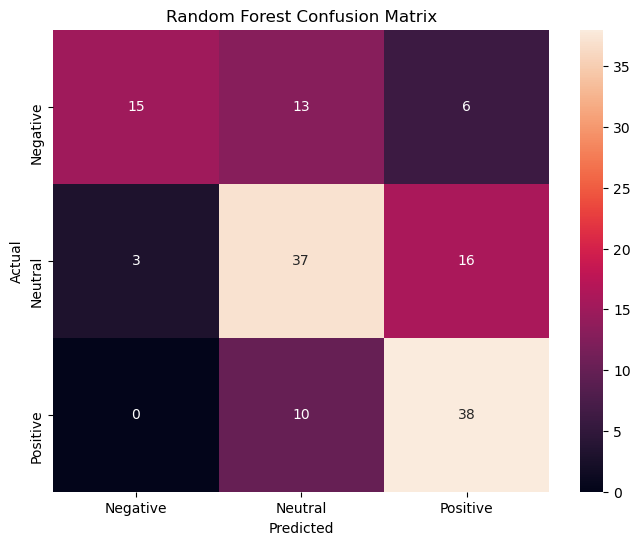

In [38]:
conf_mat = confusion_matrix(test_y, random_forest_prediction)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [31]:
# Create pipeline
random_forest_pipe = Pipeline(steps=[
    ('tf-idf', TfidfVectorizer()),
    ('random forest', RandomForestClassifier(random_state=50, n_estimators=150,)),
])

# Training
random_forest_pipe.fit(train_x, train_y)

# Make prediction
random_forest_prediction = random_forest_pipe.predict(test_x)

print(classification_report(test_y, random_forest_prediction))

              precision    recall  f1-score   support

    Negative       0.83      0.44      0.58        34
     Neutral       0.62      0.66      0.64        56
    Positive       0.63      0.79      0.70        48

    accuracy                           0.65       138
   macro avg       0.69      0.63      0.64       138
weighted avg       0.68      0.65      0.65       138



In [32]:
import joblib as jb

In [34]:
rfc_pipe_name = '../model_file/Random_Forest_TF_Model.sav'

In [35]:
jb.dump(random_forest_pipe, rfc_pipe_name)

['../model_file/Random_Forest_TF_Model.sav']

In [36]:
rfc_load = jb.load(rfc_pipe_name)

In [37]:
print(classification_report(test_y, rfc_load.predict(test_x)))

              precision    recall  f1-score   support

    Negative       0.83      0.44      0.58        34
     Neutral       0.62      0.66      0.64        56
    Positive       0.63      0.79      0.70        48

    accuracy                           0.65       138
   macro avg       0.69      0.63      0.64       138
weighted avg       0.68      0.65      0.65       138

